In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
!pip install kaggle

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spsayakpaul/arxiv-paper-abstracts")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'arxiv-paper-abstracts' dataset.
Path to dataset files: /kaggle/input/arxiv-paper-abstracts


In [30]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [14]:
import pandas as pd
import os

# This is the path you received from the previous step
path = '/root/.cache/kagglehub/datasets/spsayakpaul/arxiv-paper-abstracts/versions/2'

print("Files in the dataset folder:", os.listdir(path))

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'arxiv_data_210930-054931.csv')

# Load the data into a DataFrame
print(f"Loading data from {csv_file_path}...")
df = pd.read_csv(csv_file_path)

print("Data loaded successfully!")
display(df.head())

Files in the dataset folder: ['arxiv_data.csv', 'arxiv_data_210930-054931.csv']
Loading data from /root/.cache/kagglehub/datasets/spsayakpaul/arxiv-paper-abstracts/versions/2/arxiv_data_210930-054931.csv...
Data loaded successfully!


,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


In [37]:
single_sample = df.iloc[150]
title = single_sample['titles']
abstract = single_sample['abstracts']



category_list = [
    "Computer Science & AI", "Physics & Astronomy", "Mathematics & Logic",
    "Statistics & Data Analysis", "Quantitative Biology", "Electrical Engineering", "Economics & Finance"
]
prompt = f"""
Analyze the following research paper title and abstract.
Return a JSON object with three keys: "paper_title", "subject_area", and "research_methodology".
- For "paper_title", use the title provided.
- For "subject_area", choose the best option from this list: {category_list}
- For "research_methodology", choose one from: "Theoretical/Mathematical", "Experimental/Empirical", "Survey/Review", or "Methodological/Proposal".

Title: "{title}"
Abstract: "{abstract}"
"""

print("\nSending one request to the specified model...")
try:
    response_str = output.invoke(prompt)


    print("\n--- Analysis Complete! ---")
    result_dict = json.loads(response_str)

    print("PAPER ANALYZED:")
    print(f"  Title: {result_dict.get('paper_title', 'N/A')}")

    print("CLASSIFICATION:")
    print(f"  Subject Area: {result_dict.get('subject_area', 'N/A')}")
    print(f"  Methodology: {result_dict.get('research_methodology', 'N/A')}")

except Exception as e:
    print("--- An error occurred during the request. ---")
    print(f"Error details: {e}")


Sending one request to the specified model...

--- Analysis Complete! ---
PAPER ANALYZED:
  Title: Deep Parametric Continuous Convolutional Neural Networks
CLASSIFICATION:
  Subject Area: Computer Science & AI
  Methodology: Theoretical/Mathematical


In [16]:
# This will count the number of rows in the DataFrame 'df'
num_rows = len(df)

print(f"The DataFrame 'df' (from 'arxiv_data_210930-054931.csv') has {num_rows} rows.")

The DataFrame 'df' (from 'arxiv_data_210930-054931.csv') has 56181 rows.


In [39]:
paper_to_summarize = df.iloc[150]
paper_title = paper_to_summarize['titles']
original_abstract = paper_to_summarize['abstracts']


summarization_prompt = f"""
Summarize the following scientific abstract into a structured format using these three headings:
1.  Problem Statement: What specific problem or question is the research addressing?
2.  Methodology Used: What was the primary method or approach used by the researchers?
3.  Key Findings & Conclusion: What was the main result and its significance?

Keep the summary concise and clear for a non-expert audience.

**Abstract to Summarize**:
"{original_abstract}"
"""

print("Sending abstract to the IBM Granite model for summarization...")
try:
    summary_response = output.invoke(summarization_prompt)

    print("\n" + "="*50)
    print(f"PAPER SUMMARIZED: {paper_title}")
    print("="*50)

    print("SUMMARY:")
    print("="*50)
    print(summary_response)

except Exception as e:
    print("--- An error occurred during the summarization request. ---")
    print(f"Error details: {e}")

Sending abstract to the IBM Granite model for summarization...

PAPER SUMMARIZED: Deep Parametric Continuous Convolutional Neural Networks
SUMMARY:
1. Problem Statement:
   - Standard convolutional neural networks are limited to grid-structured inputs and rely on discrete convolutions, which restricts their use in various real-world applications dealing with non-grid data.

2. Methodology Used:
   - The researchers propose a novel learnable operator called Parametric Continuous Convolution. This operator is designed to work with non-grid structured data by utilizing parameterized kernel functions that span the entire continuous vector space. This approach enables learning from diverse data structures as long as their support relationships can be computed.

3. Key Findings & Conclusion:
   - The experiments conducted demonstrate that the proposed Parametric Continuous Convolution outperforms existing state-of-the-art methods in two significant areas: point cloud segmentation for both in

In [110]:
import pandas as pd

df_sample = df.sample(n=100, random_state=42)

print("A sample of 100 papers has been created successfully!")
print("You can now use 'df_sample' for your API analysis loop.")
display(df_sample.head())

A sample of 100 papers has been created successfully!
You can now use 'df_sample' for your API analysis loop.


,terms,titles,abstracts,full_category_name,primary_category,cleaned_category,category_list
41761,"['cs.LG', 'cs.CV', 'eess.IV']",Comparing Different Deep Learning Architecture...,Chest radiographs are among the most frequentl...,Machine Learning,cs.LG,"['cs.LG', 'cs.CV', 'eess.IV']","[cs.LG, cs.CV, eess.IV]"
30629,['cs.CV'],"TGHop: An Explainable, Efficient and Lightweig...","An explainable, efficient and lightweight meth...",Computer Vision,cs.CV,['cs.CV'],[cs.CV]
19240,"['cs.CV', 'cs.LG', 'eess.IV']",Unidentified Floating Object detection in mari...,Maritime domain is one of the most challenging...,Computer Vision,cs.CV,"['cs.CV', 'cs.LG', 'eess.IV']","[cs.CV, cs.LG, eess.IV]"
36910,"['cs.LG', 'stat.ML']",Understanding Graph Neural Networks from Graph...,Graph neural networks (GNNs) have attracted mu...,Machine Learning,cs.LG,"['cs.LG', 'stat.ML']","[cs.LG, stat.ML]"
5246,['cs.CV'],Self-Supervised Regional and Temporal Auxiliar...,Automatic facial action unit (AU) recognition ...,Computer Vision,cs.CV,['cs.CV'],[cs.CV]


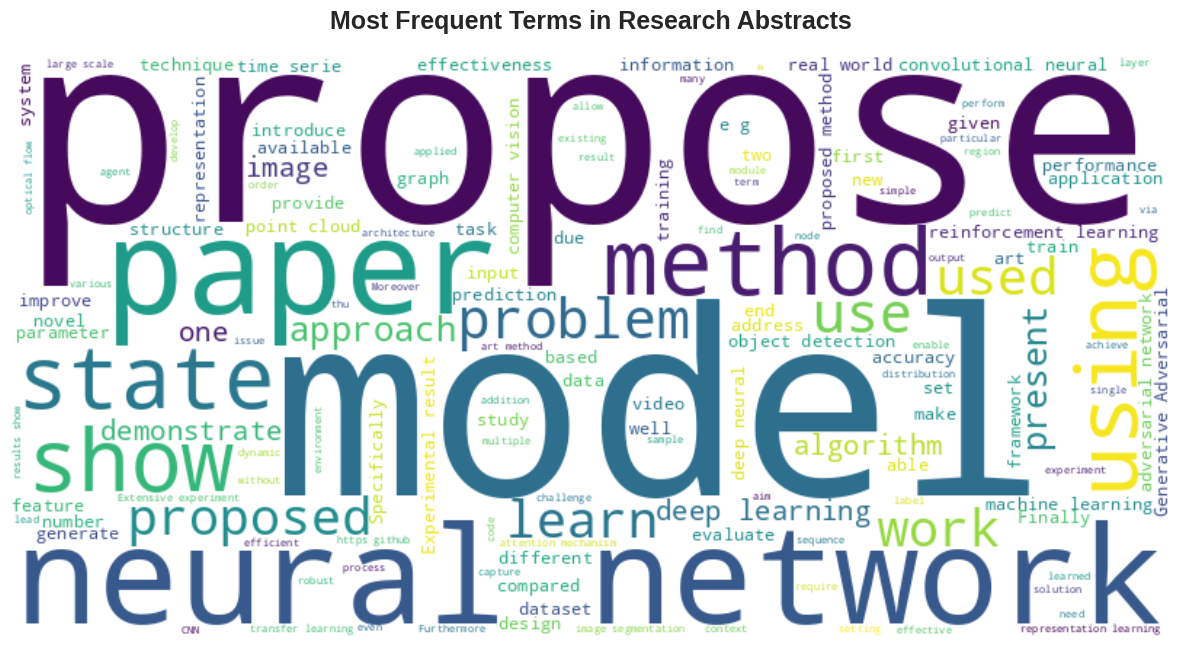

In [62]:
from wordcloud import WordCloud

# Join all the abstracts into one giant string of text
all_abstracts_text = ' '.join(df['abstracts'])


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=150,
    contour_width=3,
    contour_color='steelblue'
).generate(all_abstracts_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Terms in Research Abstracts', fontsize=18, weight='bold', pad=20)
plt.savefig('abstract_word_cloud.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-4279670728.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=df_bigrams, palette='rocket')


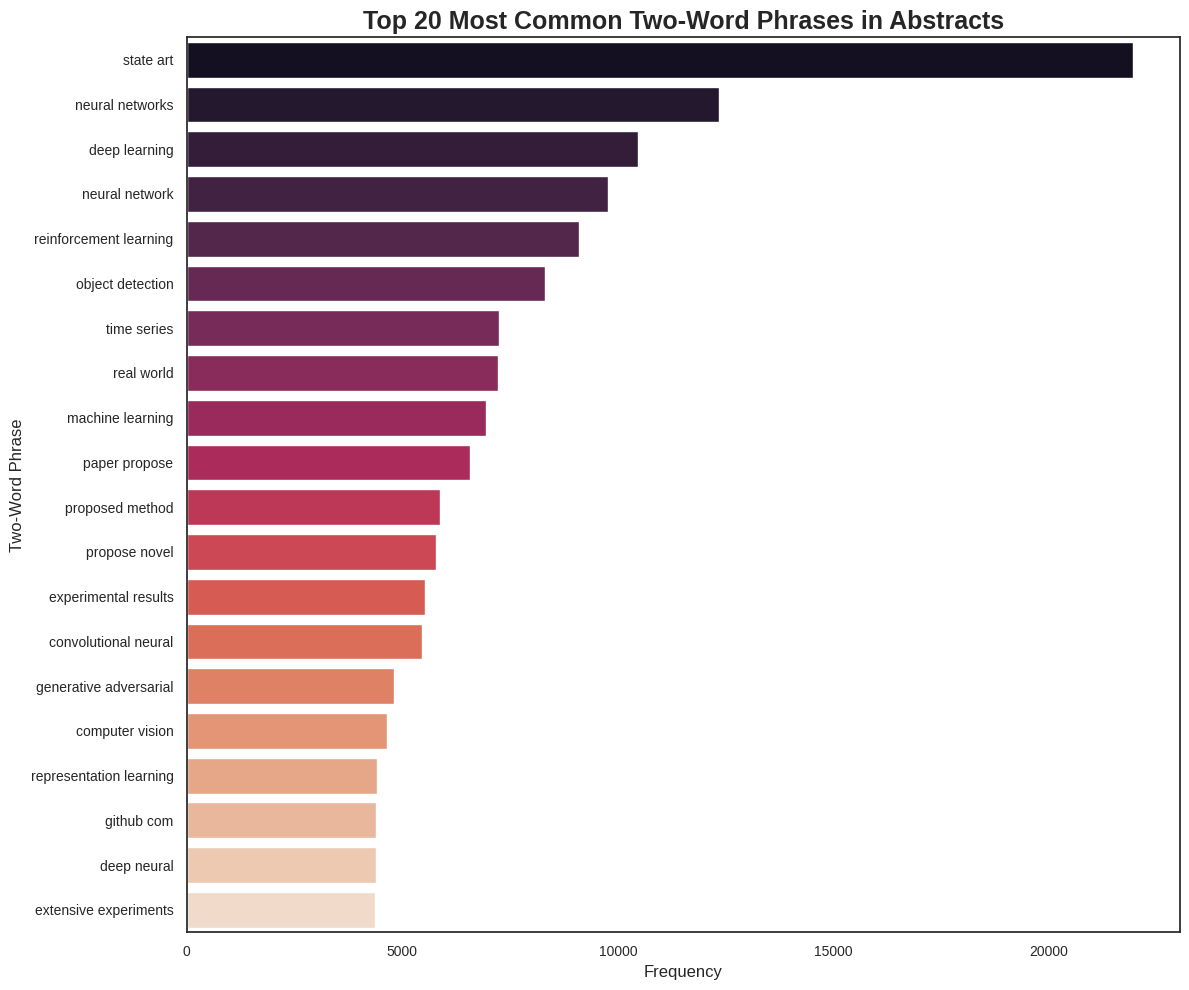

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bow = vec.fit_transform(df['abstracts'].astype(str)) # Bag-of-Words
word_counts = bow.sum(axis=0)
words_freq = [(word, word_counts[0, idx]) for word, idx in vec.vocabulary_.items()]
top_bigrams = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

# Convert to a DataFrame for easy plotting
df_bigrams = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])


plt.figure(figsize=(12, 10))
sns.barplot(x='count', y='bigram', data=df_bigrams, palette='rocket')
plt.title('Top 20 Most Common Two-Word Phrases in Abstracts', fontsize=18, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Two-Word Phrase', fontsize=12)
plt.tight_layout()
plt.savefig('top_phrases.png', dpi=300)
plt.show()

/tmp/ipython-input-3660330239.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis', orient='h')


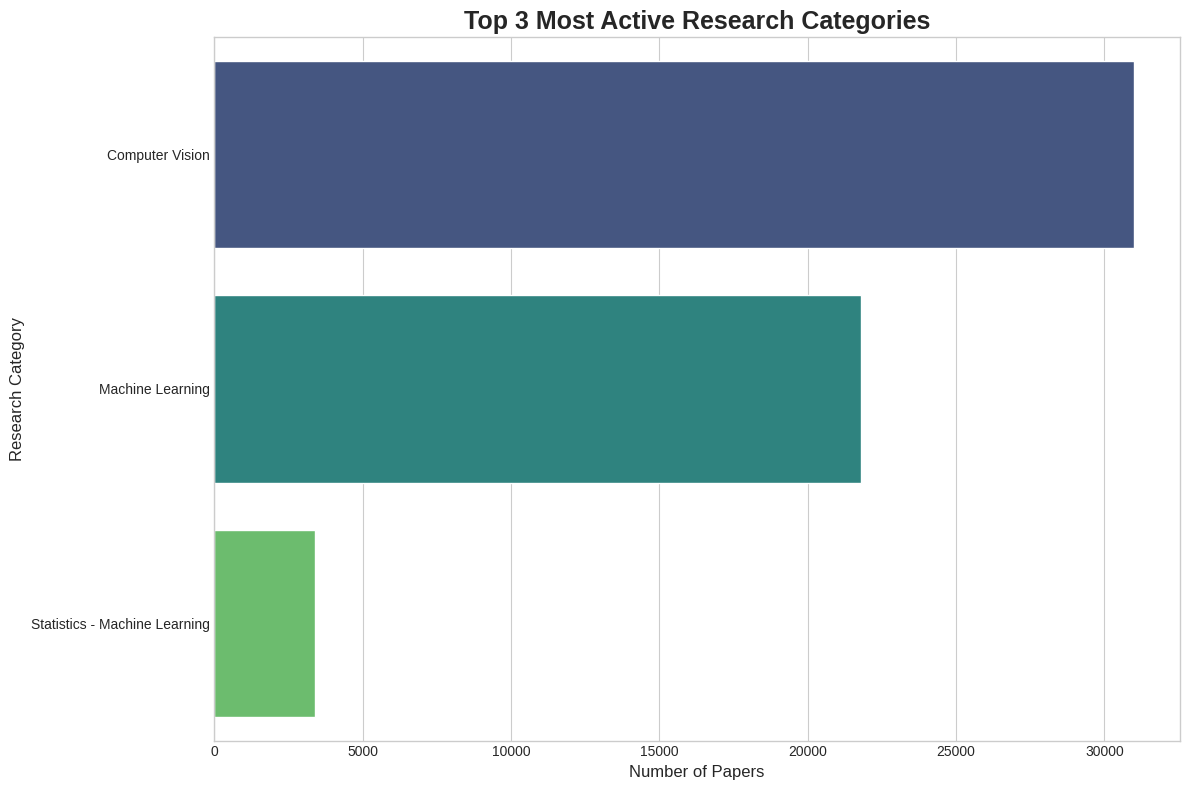

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['primary_category'] = df['terms'].astype(str) \
                                        .str.replace(r"\[|\]|'", "", regex=True) \
                                        .str.split(',') \
                                        .str[0] \
                                        .str.strip()


category_map = {
    'cs.CV': 'Computer Vision',
    'cs.LG': 'Machine Learning',
    'stat.ML': 'Statistics - Machine Learning',
    'cs.AI': 'Artificial Intelligence',
    'cs.CL': 'Computation and Language (NLP)',
    'cs.IT': 'Information Theory',
    'math.OC': 'Mathematics - Optimization',
    'eess.IV': 'Eng. - Image & Video Processing',
    'cs.RO': 'Robotics',
    'cs.NE': 'Neural & Evolutionary Computing'

}


df['full_category_name'] = df['primary_category'].apply(lambda code: category_map.get(code, 'Other'))



all_category_counts = df['full_category_name'].value_counts()

top_categories = all_category_counts[all_category_counts.index != 'Other'].nlargest(3)


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis', orient='h')

plt.title('Top 3 Most Active Research Categories', fontsize=18, weight='bold')
plt.xlabel('Number of Papers', fontsize=12)
plt.ylabel('Research Category', fontsize=12)
plt.tight_layout()
plt.savefig('top_categories_final_final.png', dpi=300)
plt.show()

if 'Other' in all_category_counts:
    print(f"\nNOTE: {all_category_counts['Other']} papers were categorized as 'Other'.")

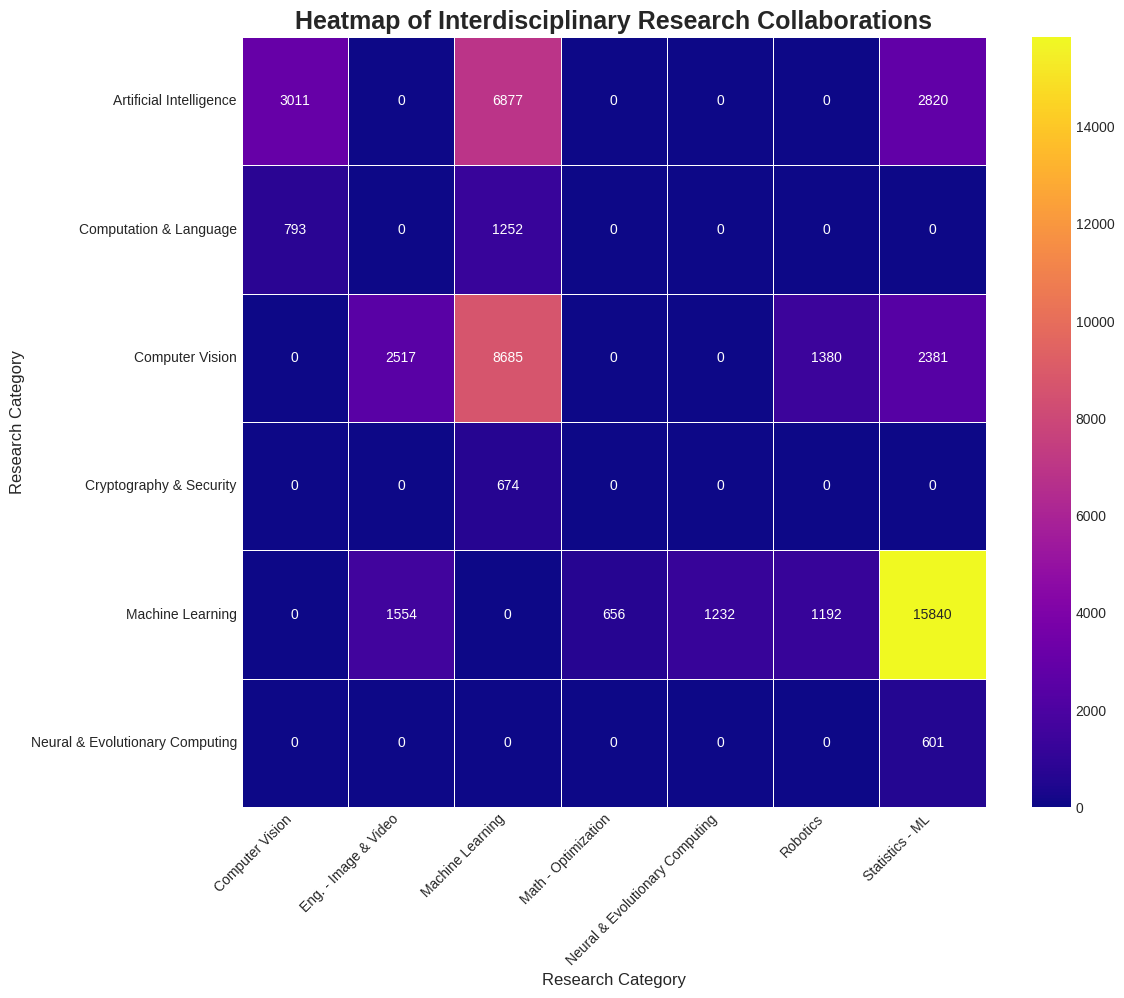

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


category_map = {
    'cs.CV': 'Computer Vision', 'cs.LG': 'Machine Learning', 'stat.ML': 'Statistics - ML',
    'cs.AI': 'Artificial Intelligence', 'cs.CL': 'Computation & Language', 'cs.IT': 'Information Theory',
    'math.OC': 'Math - Optimization', 'eess.IV': 'Eng. - Image & Video', 'cs.RO': 'Robotics',
    'cs.NE': 'Neural & Evolutionary Computing', 'math.ST': 'Math - Statistics Theory',
    'cs.CR': 'Cryptography & Security', 'hep-th': 'Physics - High Energy', 'astro-ph': 'Astrophysics'
}

# Clean the category strings and split them into lists
df['category_list'] = df['terms'].astype(str) \
                                                .str.replace(r"\[|\]|'", "", regex=True) \
                                                .str.split(', ')

# Create a new DataFrame of all category pairs from papers with >1 category
pairs = df[df['category_list'].apply(len) > 1]['category_list'].apply(lambda x: list(combinations(sorted(x), 2)))
all_pairs = pairs.explode().dropna()

# Count the frequency of each pair and create a DataFrame
pair_counts = all_pairs.value_counts().nlargest(20)
df_pairs = pd.DataFrame(pair_counts).reset_index()
df_pairs.columns = ['pair', 'count']


# Create new columns with the full names for the first and second category in the pair.
df_pairs['Category 1'] = df_pairs['pair'].str[0].map(category_map)
df_pairs['Category 2'] = df_pairs['pair'].str[1].map(category_map)

# Drop any pairs where one of the codes wasn't in our dictionary
df_pairs.dropna(inplace=True)

heatmap_data = df_pairs.pivot_table(index='Category 1', columns='Category 2', values='count').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="plasma", linewidths=.5)
plt.title('Heatmap of Interdisciplinary Research Collaborations', fontsize=18, weight='bold')
plt.xlabel('Research Category', fontsize=12)
plt.ylabel('Research Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('interdisciplinary_heatmap_full_names.png', dpi=300, bbox_inches='tight')
plt.show()

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df_rec_sample = df.sample(n=5000, random_state=42)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_rec_sample['abstracts'].astype(str))


def find_similar_papers(paper_index, top_n=5):
    # Calculate the cosine similarity between the chosen paper and all others
    cosine_sim = cosine_similarity(tfidf_matrix[paper_index], tfidf_matrix)
    # Get the indices of the most similar papers
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    similar_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Display the results
    print("---" * 20)
    print(f"Chosen Paper (Index {paper_index}): {df_rec_sample.iloc[paper_index]['titles']}")
    print("---" * 20)
    print(f"Top {top_n} Most Similar Papers:")
    return df_rec_sample.iloc[similar_indices][['titles', 'terms']]


display(find_similar_papers(paper_index=4999))

------------------------------------------------------------
Chosen Paper (Index 4999): Boosting offline handwritten text recognition in historical documents with few labeled lines
------------------------------------------------------------
Top 5 Most Similar Papers:


,titles,terms
22997,Distribution-Based Categorization of Classifie...,['cs.LG']
21503,A Survey on Negative Transfer,"['cs.LG', 'cs.CV', 'stat.ML']"
27813,SmartPatch: Improving Handwritten Word Imitati...,['cs.CV']
35438,WDR FACE: The First Database for Studying Face...,['cs.CV']
2949,Ensemble Augmentation for Deep Neural Networks...,"['cs.LG', 'cs.AI']"
